# Importing the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', '.*do not.*',)

In [2]:
# plate size, m
w = h = 0.010
# intervals in x-, y- directions, mm
dx = dy = 0.0002
# Thermal diffusivity of steel, mm2.s-1
K = 4.*0.001*0.001
rho=1.0
cp=1.0
Tcool, Thot = 300, 700
nsteps = 20000

In [3]:
nx, ny = int(w/dx), int(h/dy)
dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * K * (dx2 + dy2)/rho/cp)
T0 = Tcool * np.ones((nx, ny))
T = np.empty((nx, ny))
q = np.zeros((nx, ny))

In [4]:
def init_circ(T0):
    # Initial conditions - ring of inner radius r, width dr centred at (cx,cy) (mm)
    r, cx, cy = 0.002, 0.005, 0.005
    r2 = r**2
    for i in range(nx):
        for j in range(ny):
            p2 = (i*dx-cx)**2 + (j*dy-cy)**2
            if p2 < r2:
                T0[i,j] = Thot
    return T0

In [5]:
def init_square(T0):
    dl,cx,cy=0.002,0.005,0.005
    for i in range(nx):
        for j in range(ny):
            if (i*dx > cx-dl) and (i*dx < cx+dl) and (j*dy > cy-dl) and (j*dy <cy+dl):
                T0[i,j]=Thot
    return T0

In [6]:
def do_timestep(T0, T):
    # Propagate with forward-difference in time, central-difference in space
    T[1:-1, 1:-1] = T0[1:-1, 1:-1] + (K * dt/rho/cp) * (
          (T0[2:, 1:-1] - 2*T0[1:-1, 1:-1] + T0[:-2, 1:-1])/dx2
          + (T0[1:-1, 2:] - 2*T0[1:-1, 1:-1] + T0[1:-1, :-2])/dy2 ) +q[1:-1,1:-1]*(dt/rho/cp)

    T0 = T.copy()
    return T0, T

# Solve the equations to generate the temperature field

In [7]:
X=np.zeros((nsteps,nx,ny))
T0=init_square(T0)
for m in range(nsteps):
    T0, T = do_timestep(T0, T)
    X[m,:,:]=T[:,:]

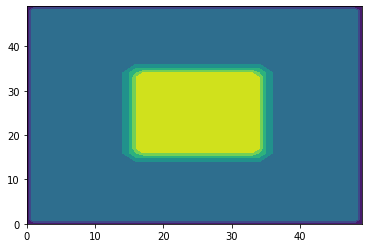

In [8]:
plt.contourf(X[0,:,:])
plt.show()

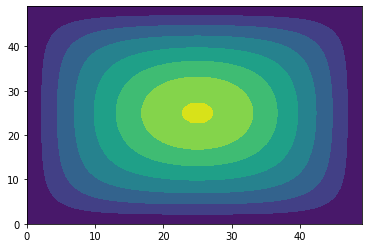

In [9]:
plt.contourf(X[100,:,:])
plt.show()